In [1]:
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods
)

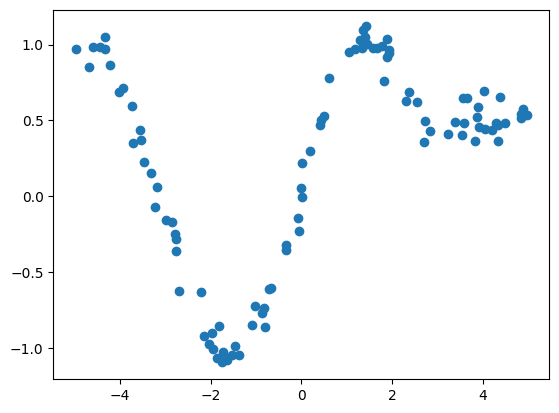

In [2]:
# Simulate some data
np.random.seed(9102)
N = 100
X = np.random.uniform(low=-5, high=5, size=(N, 1))

# Prediction points for later
num_pred_points = 1000
xnew = np.linspace(-5, 5, num_pred_points).reshape(-1, 1)

# Outcome is sin with unit specific offset
# Y = (np.sin(X[:, 1] + X[:, 0]) + X[:, 0] + np.random.normal(scale=.1, size=N)).reshape(-1, 1)
Y = np.sin(X)
Y[X >= 3] = 0.5
Y += np.random.normal(scale=.1, size=(N, 1))

# Plot the function
plt.scatter(X, Y)
plt.show()

In [3]:
# Make base class
gp = model_classes.BaseGP(
    X=X,
    Y=Y,
    kernel=gpflow.kernels.SquaredExponential(),
    verbose=True
)
print(gpflow.utilities.print_summary(gp))

╒════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═════════╤══════════════════╕
│ name                       │ class     │ transform        │ prior   │ trainable   │ shape         │ dtype   │ value            │
╞════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═══════════════╪═════════╪══════════════════╡
│ BaseGP.mean_function.c     │ Parameter │ Identity         │         │ True        │ (1,)          │ float64 │ [0.]             │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()            │ float64 │ 1.0              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True       

In [4]:
# Randomize initial values and then optimize hyperparameters
gp.randomize_params(random_seed=9102)
gp.optimize_params()
gp

Round 0 training loss: 619.6217317747733
Round 100 training loss: 260.02023207483865
Round 200 training loss: 228.96248627344772
Round 300 training loss: 212.02101587102788
Round 400 training loss: 198.76211221686265
Round 500 training loss: 187.25811864512752
Round 600 training loss: 176.85620187041104
Round 700 training loss: 167.16123534075598
Round 800 training loss: 157.90492078418453
Round 900 training loss: 148.9891147496478
Round 1000 training loss: 140.43088256526252
Round 1100 training loss: 132.25972984314816
Round 1200 training loss: 124.48400103775396
Round 1300 training loss: 117.10057277050757
Round 1400 training loss: 110.1012174308815
Round 1500 training loss: 103.47424871407641
Round 1600 training loss: 97.20550432431429
Round 1700 training loss: 91.27915962028692
Round 1800 training loss: 85.67838040464905
Round 1900 training loss: 80.38585193729065
Round 2000 training loss: 75.38420882179572
Round 2100 training loss: 70.65637599399048
Round 2200 training loss: 66.18

name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.41661]
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.16698
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.34271
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.01432
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[8.79250e-01...
BaseGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[1.86820e-01, 0.00000e+00, 0.00000e+00..."


In [5]:
# Show that we can do this process a number of times to search parameter space easier
gp.random_restart_optimize(num_restart=3)

Random restart 1
Round 0 training loss: 222.31017452384017
Round 100 training loss: 185.68297562584848
Round 200 training loss: 147.543735348382
Round 300 training loss: 94.72281367288005
Round 400 training loss: 42.73554123536706
Round 500 training loss: 9.91170347061631
Round 600 training loss: 0.1685095355536248
Round 700 training loss: -1.5534428867297692
Round 800 training loss: -2.5734472596028724
Round 900 training loss: -3.5383826171176906
Round 1000 training loss: -4.467527687002871
Round 1100 training loss: -5.363134014924455
Round 1200 training loss: -6.226977401915548
Round 1300 training loss: -7.060729592111116
Round 1400 training loss: -7.865974523832335
Round 1500 training loss: -8.644210014471469
Round 1600 training loss: -9.396834931507527
Round 1700 training loss: -10.125207937197231
Round 1800 training loss: -10.830578402502482
Round 1900 training loss: -11.514121929377652
Round 2000 training loss: -12.176669691881372
Round 2100 training loss: -12.82008991314595
Roun

Optimization converged - stopping early (round 3575)
Found better parameters!
Random restart 2
Round 0 training loss: 296.417437389823
Round 100 training loss: 171.53463696080559
Round 200 training loss: 116.06840722781563
Round 300 training loss: 61.632871159347495
Round 400 training loss: 14.062606847849061
Round 500 training loss: -13.779822155096312
Round 600 training loss: -21.318006799992574
Round 700 training loss: -22.30665290382163
Round 800 training loss: -22.737392439588376
Round 900 training loss: -23.144152143669736
Round 1000 training loss: -23.5422778592623
Round 1100 training loss: -23.932357803859233
Round 1200 training loss: -24.314706561904657
Round 1300 training loss: -24.689616036512355
Round 1400 training loss: -25.057363730106246
Round 1500 training loss: -25.418213678176237
Round 1600 training loss: -25.772417055678986
Round 1700 training loss: -26.120212792179935
Round 1800 training loss: -26.461828188981563
Round 1900 training loss: -26.797479526806598
Round 2

Found better parameters!
Random restart 3
Round 0 training loss: 320.5651391103721
Round 100 training loss: 209.56359996519336
Round 200 training loss: 167.24672479686512
Round 300 training loss: 113.71360122266799
Round 400 training loss: 51.343870862641175
Round 500 training loss: -1.5917979269649294
Round 600 training loss: -29.09301731079902
Round 700 training loss: -34.71586732946527
Round 800 training loss: -35.22286489154109
Round 900 training loss: -35.451699852362836
Round 1000 training loss: -35.67299014174013
Round 1100 training loss: -35.89161489488307
Round 1200 training loss: -36.107691696253966
Round 1300 training loss: -36.32128224887072
Round 1400 training loss: -36.53244501634562
Round 1500 training loss: -36.74123649962841
Round 1600 training loss: -36.947711341515856
Round 1700 training loss: -37.15192238662801
Round 1800 training loss: -37.35392074418048
Round 1900 training loss: -37.55375585108962
Round 2000 training loss: -37.75147553554784
Round 2100 training lo

In [6]:
gp

name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.42973]
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,0.17177
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.33456
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00887
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[7.88120e-01...
BaseGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[8.92000e-02, 0.00000e+00, 0.00000e+00..."


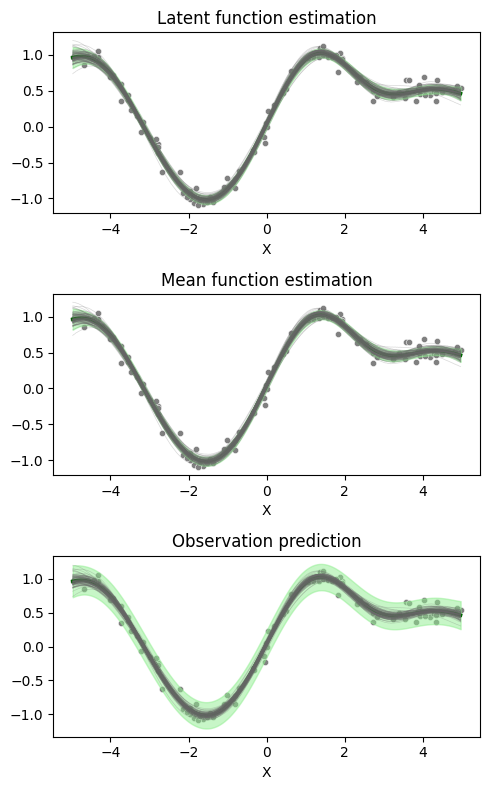

In [7]:
# Now plot the resulting model predictions 
# (first two are the same given the gaussian likelihood)
figs, axs = plt.subplots(3, 1, figsize=(5, 8))
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
gp.plot_functions(x_idx=0, col_names=['X'], predict_type='obs', ax=axs[2])
axs[2].set_title('Observation prediction')
figs.tight_layout()
plt.show()

In [8]:
# Also have built-in methods to calculate values of interest
print(f"Variance explained for each component: {gp.variance_explained()}")
print(f"BIC: {gp.calc_metric()}")

Variance explained for each component: None
BIC: -77.11312161441967


## Nonnormal data

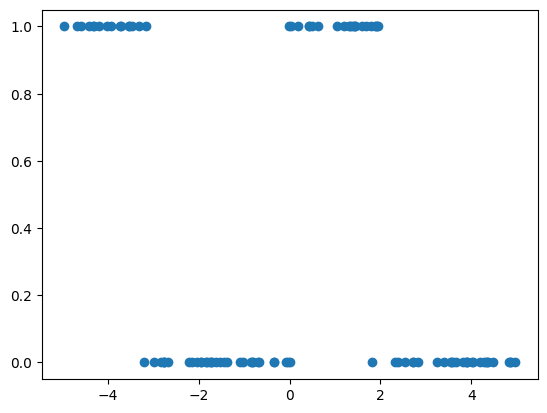

In [9]:
np.random.seed(9102)
import scipy
Y_binomial = np.random.binomial(n=1, p=scipy.special.expit(Y))
plt.scatter(X, Y_binomial)
plt.show()

In [10]:
logistic_gp = model_classes.VarGP(
    X=X,
    Y=Y_binomial,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='bernoulli',
    verbose=True # Can set this option to see what is going on (default: False)
)

In [11]:
# logistic_gp.randomize_params()
# Optimization parameters can also be customized if interested
logistic_gp.optimize_params(
    # adam_learning_rate=0.00001,
    # convergence_threshold=1e-3,
    # num_opt_iter=20000
)
logistic_gp

Round 0 training loss: 98.90145134101398
Round 100 training loss: 76.86140969777057
Round 200 training loss: 69.77188922647326
Round 300 training loss: 66.73165772020587
Round 400 training loss: 65.18331349573566
Round 500 training loss: 64.23861894659618
Round 600 training loss: 63.54970921319209
Round 700 training loss: 62.958300724763944
Round 800 training loss: 62.380467122929815
Round 900 training loss: 61.76503764645447
Round 1000 training loss: 61.07803572478664
Round 1100 training loss: 60.29745749704029
Round 1200 training loss: 59.411700084983956
Round 1300 training loss: 58.417959853838475
Round 1400 training loss: 57.31953026438163
Round 1500 training loss: 56.12356549611662
Round 1600 training loss: 54.84025670036016
Round 1700 training loss: 53.48293168026366
Round 1800 training loss: 52.06781493275302
Round 1900 training loss: 50.613252438317375
Round 2000 training loss: 49.13860025541933
Round 2100 training loss: 47.663022639377914
Round 2200 training loss: 46.204408245

name,class,transform,prior,trainable,shape,dtype,value
VarGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.73753]
VarGP.kernel.variance,Parameter,Softplus,,True,(),float64,4.30421
VarGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.03606
VarGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
VarGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[1.43751e+00...
VarGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[5.0448e-01, 0.0000e+00, 0.0000e+00..."


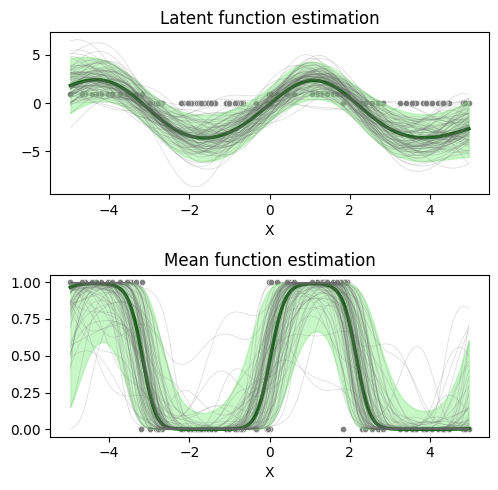

In [12]:
# Now plot the resulting model predictions
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')

logistic_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')

figs.tight_layout()
plt.show()

## Zero Inflated Negative Binomial

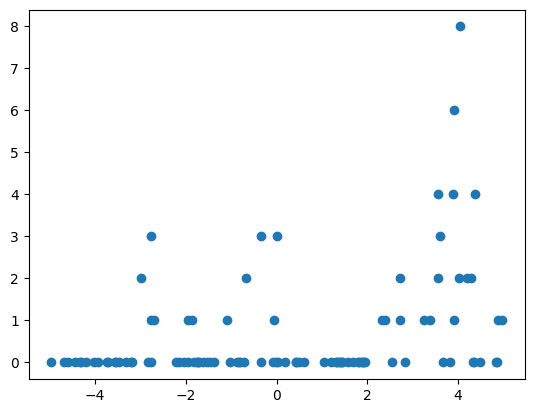

In [13]:

zinb = likelihoods.ZeroInflatedNegativeBinomial()

def zinb_sample(zinb, X, Y):
    m = zinb.invlink(Y) #* zinb.scale
    r = 1. / zinb.alpha
    np.random.seed(9102)
    obs_flag = np.random.binomial(n=1, p=(1.0 - (m/ (zinb.km + m))))
    intensity_val = np.random.negative_binomial(
        n=r, 
        p=(r / (m + r))
    )
    return obs_flag * intensity_val

# Y_zinb = zinb._conditional_mean(X, Y).numpy()
# Y_zinb = likelihoods.ZeroInflatedNegativeBinomial().invlink(Y).numpy()
Y_zinb = zinb_sample(zinb, X, Y).astype(float)
plt.scatter(X, Y_zinb)

In [14]:
zinb_gp = model_classes.VarGP(
    X=X,
    Y=Y_zinb,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='zeroinflated_negativebinomial'
)
zinb_gp.optimize_params()

Optimization not converged after 5000 rounds


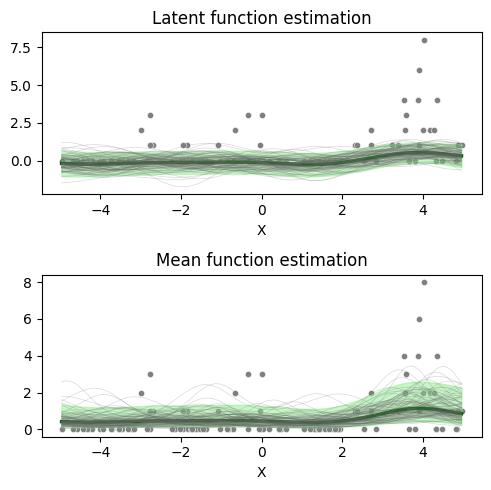

In [15]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
zinb_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
zinb_gp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## Inducing points

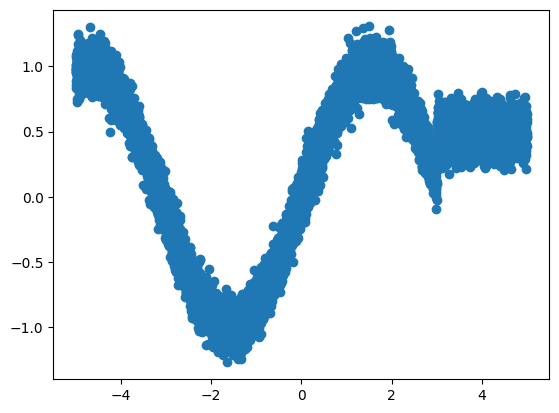

In [16]:
# Simulate some data
np.random.seed(9102)
X_big = np.random.uniform(low=-5, high=5, size=(100*N, 1))
Y_big = np.sin(X_big)
Y_big[X_big >= 3] = 0.5
Y_big += np.random.normal(scale=.1, size=(100*N, 1))
plt.scatter(X_big, Y_big)

In [17]:
sgp = model_classes.SparseGP(
    X=X_big,
    Y=Y_big,
    kernel=gpflow.kernels.SquaredExponential(),
    num_inducing_points=10,
    random_seed=9102
)
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.42973]
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


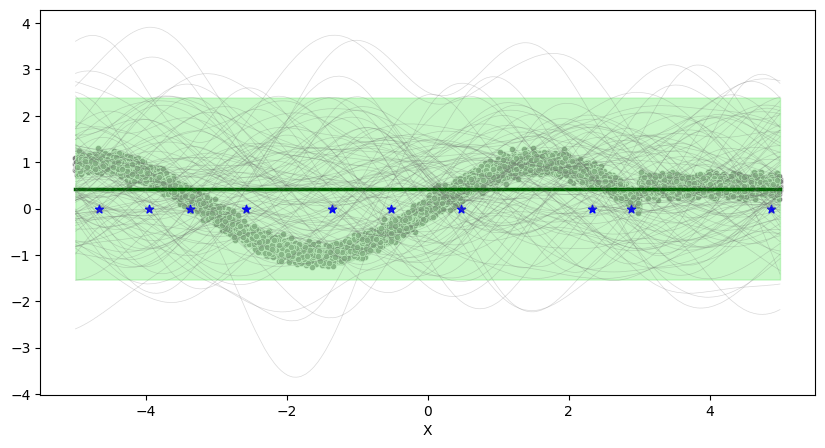

In [18]:
# Plot original points with inducing points
sgp.plot_functions(x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

In [19]:
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.42973]
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


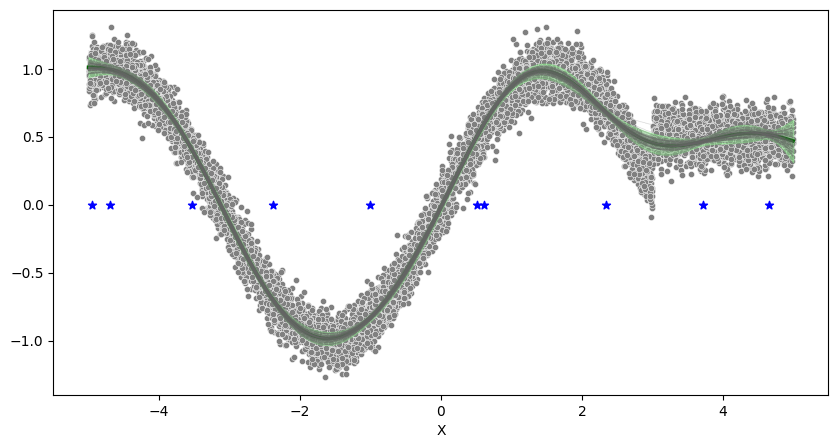

In [20]:
# Now optimize parameters (inclduing inducing points) and plot results
sgp.optimize_params()
sgp.plot_functions(x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

## Penalized GP

In [21]:
pgp = model_classes.PenalizedGP(
    X=X,
    Y=Y,
    penalization_factor=10.
)

In [22]:
pgp.optimize_params()
pgp

Optimization not converged after 5000 rounds


name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.26204]
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.29176
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.34009
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.01635
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[8.62580e-01...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[1.7056e-01, 0.0000e+00, 0.0000e+00..."


In [23]:
# Search over penalization factors
pgp.penalization_search()

Penalization search:   0%|          | 0/15 [00:00<?, ?it/s]

Penalization search:   7%|▋         | 1/15 [00:49<11:33, 49.53s/it]

Optimization not converged after 5000 rounds
Optimization not converged after 5000 rounds
Optimization not converged after 5000 rounds


Penalization search:  20%|██        | 3/15 [00:49<02:34, 12.90s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 5000 rounds


Penalization search:  33%|███▎      | 5/15 [00:50<01:03,  6.36s/it]

Optimization not converged after 5000 rounds


Penalization search:  40%|████      | 6/15 [00:50<00:42,  4.74s/it]

Optimization not converged after 5000 rounds
Optimization not converged after 5000 rounds


Penalization search:  53%|█████▎    | 8/15 [00:51<00:20,  2.93s/it]

Optimization not converged after 5000 rounds


Penalization search:  60%|██████    | 9/15 [00:51<00:13,  2.32s/it]

Optimization not converged after 5000 rounds


Penalization search:  67%|██████▋   | 10/15 [00:52<00:09,  1.86s/it]

Optimization not converged after 5000 rounds


Penalization search:  73%|███████▎  | 11/15 [01:21<00:36,  9.02s/it]

Optimization not converged after 5000 rounds


Penalization search:  80%|████████  | 12/15 [01:21<00:19,  6.61s/it]

Optimization not converged after 5000 rounds
Optimization not converged after 5000 rounds
Optimization not converged after 5000 rounds


Penalization search: 100%|██████████| 15/15 [01:22<00:00,  5.50s/it]


Optimization not converged after 5000 rounds
Optimization not converged after 5000 rounds


In [24]:
print(f'GP new penalization factor: {pgp.penalization_factor}')
pgp

GP new penalization factor: 10.0


name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[0.2606]
PenalizedGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.29423
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.3339
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.01016
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[8.87570e-01...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[9.6840e-02, 0.0000e+00, 0.0000e+00..."


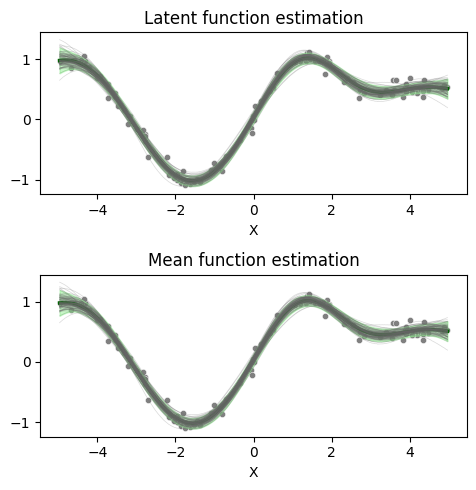

In [25]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
pgp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
pgp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## Putting it all together

In [26]:
Y_zinb_big = zinb_sample(zinb, X_big, Y_big).astype(float)
psvgp = model_classes.PSVGP(
    X=X_big,
    Y=Y_zinb_big,
    penalized_options={'penalization_factor': 10.},
    sparse_options={'num_inducing_points': 100},
    variational_options={'likelihood': 'zeroinflated_negativebinomial'}
)
psvgp

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.00386]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,1.0
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,1.0
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-4.75419...
PSVGP.q_mu,Parameter,Identity,Normal,True,"(100, 1)",float64,[[0....
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,True,"(1, 100, 100)",float64,"[[[1., 0., 0...."


In [27]:
psvgp.optimize_params(num_opt_iter=100)
psvgp

Optimization not converged after 100 rounds


name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.1275]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.76881
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.15736
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.05573
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.53783
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-4.8452...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[-1.30723e+00...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[6.5675e-01, 0.0000e+00, 0.0000e+00..."


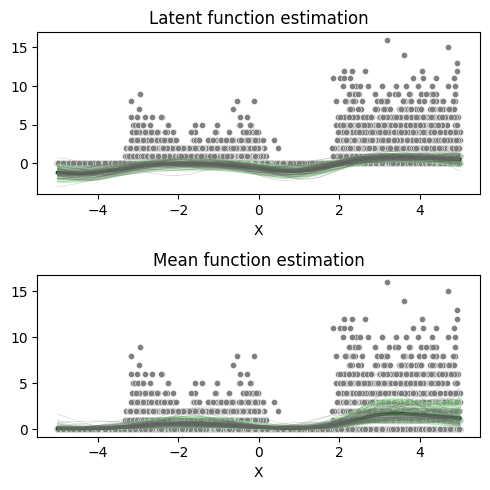

In [28]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
psvgp.plot_functions(x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
psvgp.plot_functions(x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

## GP Search Class

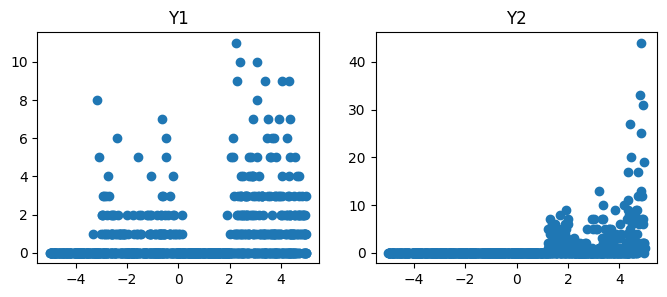

In [30]:
pd_X = pd.DataFrame(
    data=X_big[:1000, :],
    columns=['X']
)
pd_Y = pd.DataFrame(
    data=Y_zinb_big[:1000, :],
    columns=['Y1']
)
pd_Y['Y2'] = zinb_sample(zinb, pd_X['X'], pd_Y['Y1'] + 0.001*pd_X['X'] + 0.5).astype(float)

figs, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(pd_X, pd_Y['Y1'])
axs[0].set_title('Y1')
axs[1].scatter(pd_X, pd_Y['Y2'])
axs[1].set_title('Y2')

gps = model_search.GPSearch(
    X=pd_X,
    Y=pd_Y,
    outcome_likelihood='zeroinflated_negativebinomial',
)

In [31]:
gps.run_penalized_search(
    num_jobs=6,
    kernel_options={'kerns': [gpflow.kernels.SquaredExponential(), gpflow.kernels.Matern12()]},
    sparse_options={'num_inducing_points': 100},
    optimization_options={'num_opt_iter': 500},
    search_options={'random_seed': 9102}
)

GPSearch:   0%|          | 0/30 [00:00<?, ?it/s]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds
Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  13%|█▎        | 4/30 [03:05<12:20, 28.49s/it]

Optimization not converged after 500 rounds


GPSearch:  17%|█▋        | 5/30 [03:05<08:15, 19.82s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  23%|██▎       | 7/30 [06:07<24:52, 64.89s/it]

Optimization not converged after 500 rounds


GPSearch:  27%|██▋       | 8/30 [06:08<16:40, 45.48s/it]

Optimization not converged after 500 rounds


GPSearch:  30%|███       | 9/30 [06:08<11:10, 31.93s/it]

Optimization not converged after 500 rounds


GPSearch:  33%|███▎      | 10/30 [06:09<07:27, 22.39s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  40%|████      | 12/30 [06:10<03:42, 12.36s/it]

Optimization not converged after 500 rounds


GPSearch:  43%|████▎     | 13/30 [07:52<09:48, 34.60s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  50%|█████     | 15/30 [07:54<04:44, 18.96s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


Optimization not converged after 500 rounds


GPSearch:  53%|█████▎    | 16/30 [10:52<14:50, 63.63s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  57%|█████▋    | 17/30 [10:54<09:58, 46.07s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  63%|██████▎   | 19/30 [10:56<04:18, 23.50s/it]

Optimization not converged after 500 rounds


Optimization not converged after 500 rounds


GPSearch:  67%|██████▋   | 20/30 [11:17<03:47, 22.73s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  70%|███████   | 21/30 [11:23<02:40, 17.83s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  73%|███████▎  | 22/30 [13:59<07:52, 59.11s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch:  80%|████████  | 24/30 [14:01<02:57, 29.54s/it]

Optimization not converged after 500 rounds


GPSearch:  83%|████████▎ | 25/30 [14:03<01:45, 21.13s/it]

Optimization not converged after 500 rounds
Optimization not converged after 500 rounds


GPSearch:  90%|█████████ | 27/30 [14:29<00:48, 16.32s/it]

Optimization not converged after 500 rounds


GPSearch:  93%|█████████▎| 28/30 [15:53<01:13, 36.51s/it]

Optimization not converged after 500 rounds


GPSearch:  97%|█████████▋| 29/30 [15:54<00:25, 25.94s/it]

Optimization not converged after 500 rounds


GPSearch: 100%|██████████| 30/30 [15:55<00:00, 18.27s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.NaturalGradient` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.NaturalGradient`.


Optimization not converged after 500 rounds


GPSearch: 100%|██████████| 30/30 [16:00<00:00, 32.00s/it]


In [32]:
gps.models['Y1']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.01848]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.10009
PSVGP.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.40838
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,0.11915
PSVGP.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.28949
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,0.54631
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,0.38278
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-1.3356...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[-0.24926...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[9.1023e-01, 0.0000e+00, 0.0000e+00..."


In [33]:
gps.models['Y2']

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.01848]
PSVGP.kernel.kernels[0].variance,Parameter,Softplus,Exponential,True,(),float64,0.39688
PSVGP.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.36313
PSVGP.kernel.kernels[1].variance,Parameter,Softplus,Exponential,True,(),float64,0.3242
PSVGP.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,0.22798
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.66446
PSVGP.likelihood.km,Parameter,Softplus,,True,(),float64,1.03197
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[0.77078...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(100, 1)",float64,[[-0.53366...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 100, 100)",float64,"[[[7.8762e-01, 0.0000e+00, 0.0000e+00..."


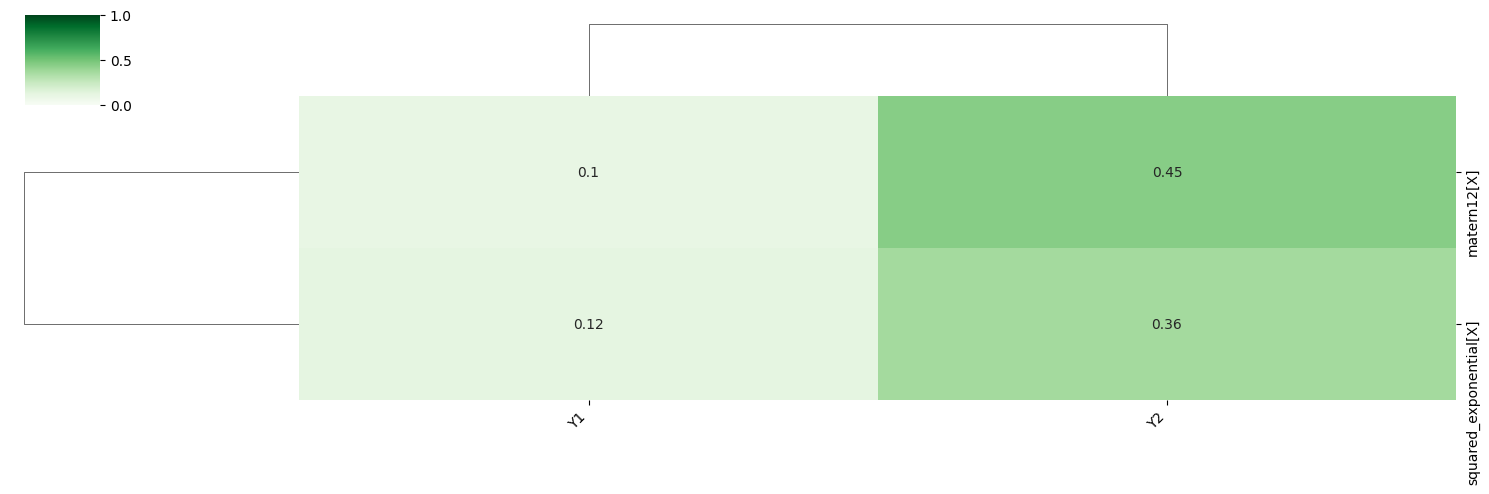

In [34]:
# Something still seems off here with the filtering of values
gps.plot_heatmap(var_cutoff=0)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X] (-21.3%)'}, xlabel='X'>,
         <Axes: title={'center': 'matern12[X] (-18.8%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (140.1%)'}, xlabel='X'>,
         <Axes: >]], dtype=object))

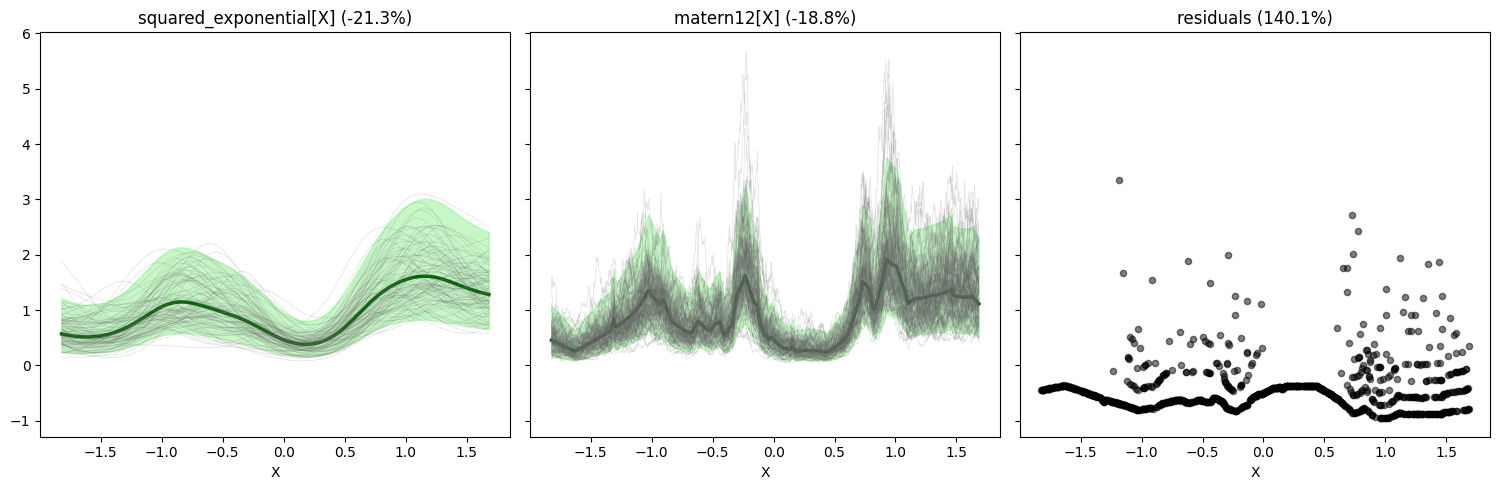

In [35]:
gps.plot_parts(out_label='Y1', x_axis_label='X')#, conf_level_val=0.1)
# plt.yscale('log')
# plt.ylim(-10, 100)

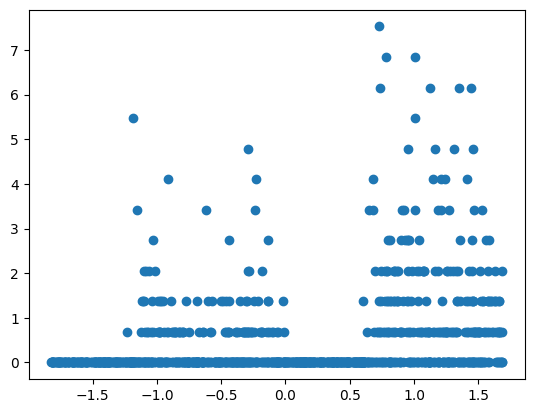

In [36]:
plt.scatter(gps.models['Y1'].X, gps.models['Y1'].Y)

(<Figure size 2000x500 with 3 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X] (-2.3%)'}, xlabel='X'>,
         <Axes: title={'center': 'matern12[X] (-1.8%)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (104.1%)'}, xlabel='X'>,
         <Axes: >]], dtype=object))

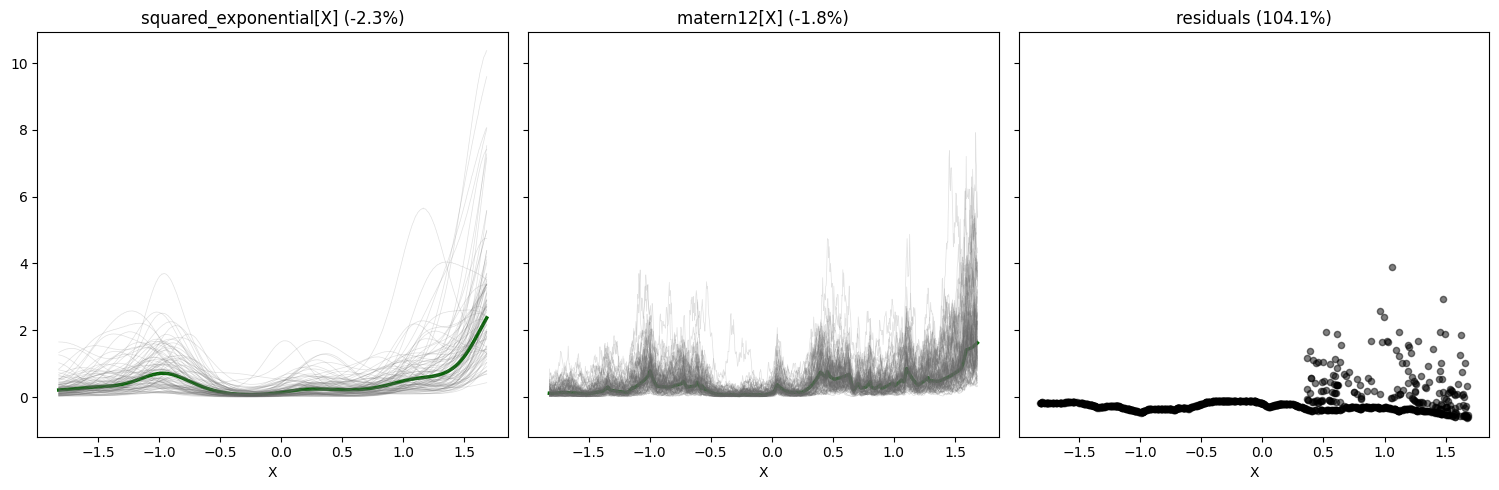

In [37]:
gps.plot_parts(out_label='Y2', x_axis_label='X', conf_level_val=0)
# plt.yscale('log')
# plt.ylim(-10, 100)

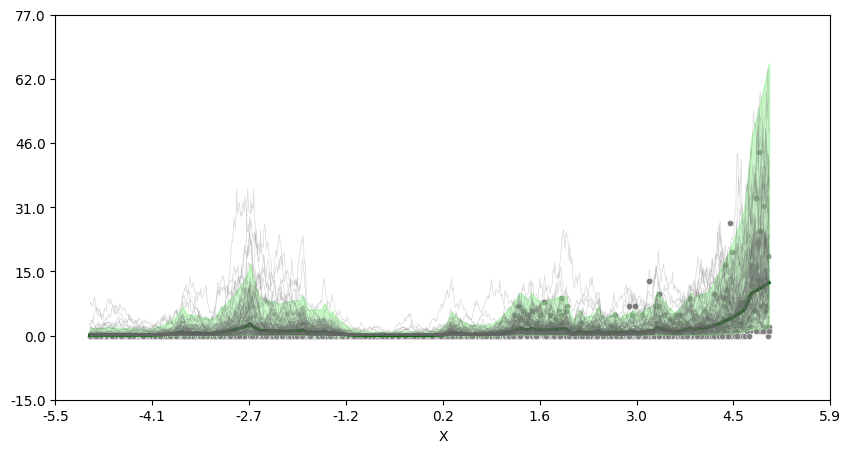

In [38]:
gps.plot_marginal(out_label="Y2", x_axis_label="X", reverse_transform_axes=True)
# # labels = [item.get_text()*gps.X_stds[0] for item in plt.get_xticklabels()]
# # plt.set_xticklabels(labels)

# # x_loc, x_labels = plt.xticks()
# # x_labels = [numeric(x) * gps.X_stds for x in x_labels]
# # plt.xticks(ticks=x_loc, labels=x_labels)
# plt.xticks(
#     ticks=plt.xticks()[0], 
#     labels=np.round(gps.X_stds[0]*np.array(plt.xticks()[0], dtype=np.float64) + gps.X_means[0], 1)
# )

# plt.yticks(
#     ticks=plt.yticks()[0],
#     labels=np.round(gps.Y_stds[0]*np.array(plt.yticks()[0], dtype=np.float64) + gps.Y_means[0], 1)
# )
plt.show()

## Account for multiple time-specific effects

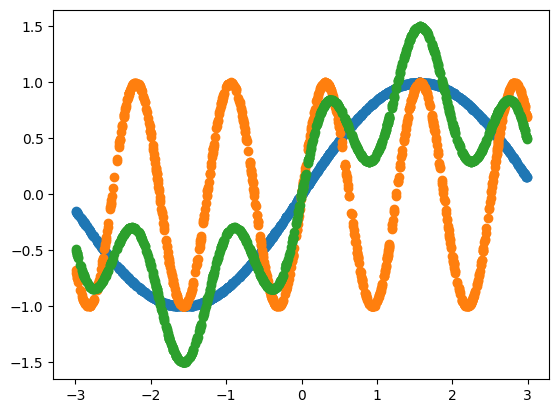

In [39]:
# Multiple time components with different lengthscales
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods,
    utilities
)


np.random.seed(9102)
n = 1000
x_time = np.random.uniform(low=-3, high=3, size=n)
y_time = np.sin(x_time) 
y_time2 = np.sin(5*x_time)
y_time_out = y_time + 0.5*y_time2

plt.scatter(x_time, y_time)
plt.scatter(x_time, y_time2)
plt.scatter(x_time, y_time_out)

In [40]:
gps_time = model_search.GPSearch(
    X=pd.DataFrame({
        "time": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian",
)

gps_time.penalized_optimization(optimization_options={'num_opt_iter': 500})

GPOptimize (no search):   0%|          | 0/1 [01:34<?, ?it/s]


In [41]:
gps_time.models["y_mixed"]

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,"(1,)",float64,[-0.19706]
PSVGP.kernel.variance,Parameter,Softplus,Exponential,True,(),float64,0.35482
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.69953
PSVGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.21089
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(500, 1)",float64,[[-1.32580e-01...
PSVGP.q_mu,Parameter,Identity,Normal,False,"(500, 1)",float64,[[1.91240e-01...
PSVGP.q_sqrt,Parameter,FillTriangular,HalfNormal,False,"(1, 500, 500)",float64,"[[[2.1207e-01, 0.0000e+00, 0.0000e+00..."


In [42]:
utilities.calc_rsquare(gps_time.models["y_mixed"])

[0.832, 0.168]

In [43]:
gps_time.models["y_mixed"].kernel

name,class,transform,prior,trainable,shape,dtype,value
SquaredExponential.variance,Parameter,Softplus,Exponential,True,(),float64,0.35482
SquaredExponential.lengthscales,Parameter,Softplus,,True,(),float64,0.69953


(<Figure size 2000x500 with 2 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time] (83.2%)'}, xlabel='time'>,
         <Axes: title={'center': 'residuals (16.8%)'}, xlabel='time'>,
         <Axes: >, <Axes: >]], dtype=object))

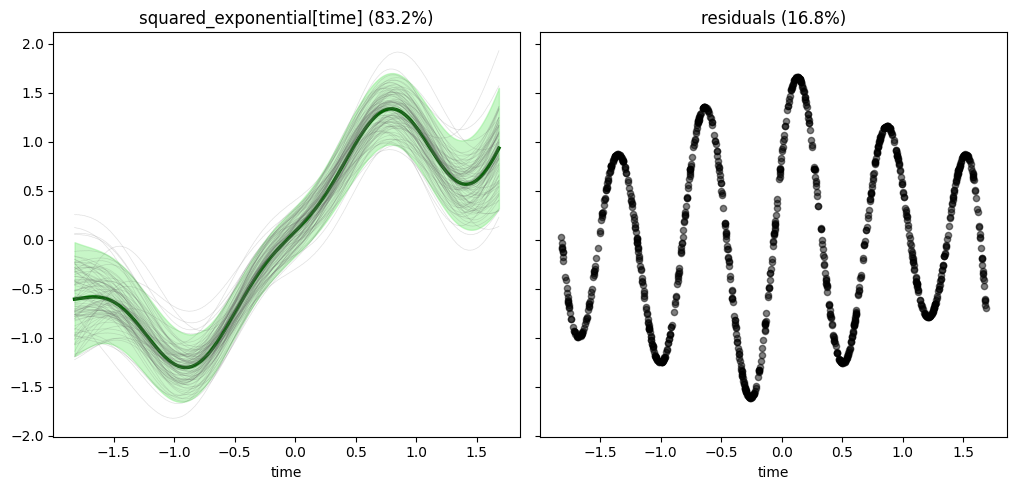

In [44]:
gps_time.plot_parts(out_label="y_mixed", x_axis_label="time")

In [45]:
# from waveome import utilities

# mu_, var_, fns_, covs_ = utilities.individual_kernel_predictions(
#     model=gps_time.models["y_mixed"],
#     kernel_idx=0,
#     X=gps_time.models["y_mixed"].X
# )

# plt.scatter(
#     gps_time.models["y_mixed"].X,
#     mu_
# )

<Axes: xlabel='time'>

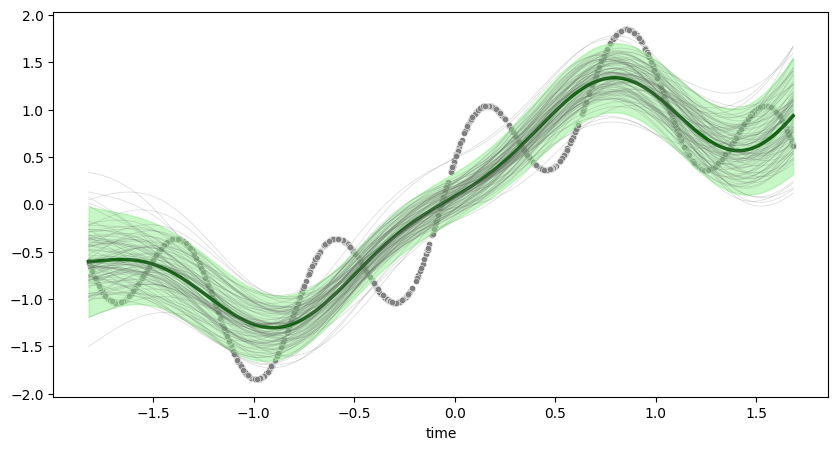

In [46]:
gps_time.plot_marginal(out_label="y_mixed", x_axis_label="time")

In [47]:
# Now add two time columns
gps_time2 = model_search.GPSearch(
    X=pd.DataFrame({
        "time1": x_time,
        "time2": x_time
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian"
)

gps_time2.penalized_optimization(
    random_seed=9102,
    num_random_restarts=5,
    kernel_options={
        "second_order_numeric": False,
        "kerns": [
            gpflow.kernels.SquaredExponential(), 
            gpflow.kernels.Periodic(base_kernel=gpflow.kernels.SquaredExponential())
        ]
    }
)

GPOptimize (no search):   0%|          | 0/1 [00:00<?, ?it/s]

GPOptimize (no search):   0%|          | 0/1 [04:19<?, ?it/s]


(<Figure size 2000x1000 with 5 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[time1] (30.6%)'}, xlabel='time1'>,
         <Axes: title={'center': 'periodic[time1] (24.4%)'}, xlabel='time1'>,
         <Axes: title={'center': 'squared_exponential[time2] (21.5%)'}, xlabel='time2'>,
         <Axes: title={'center': 'periodic[time2] (23.4%)'}, xlabel='time2'>],
        [<Axes: title={'center': 'residuals (0.0%)'}, xlabel='time1'>,
         <Axes: >, <Axes: >, <Axes: >]], dtype=object))

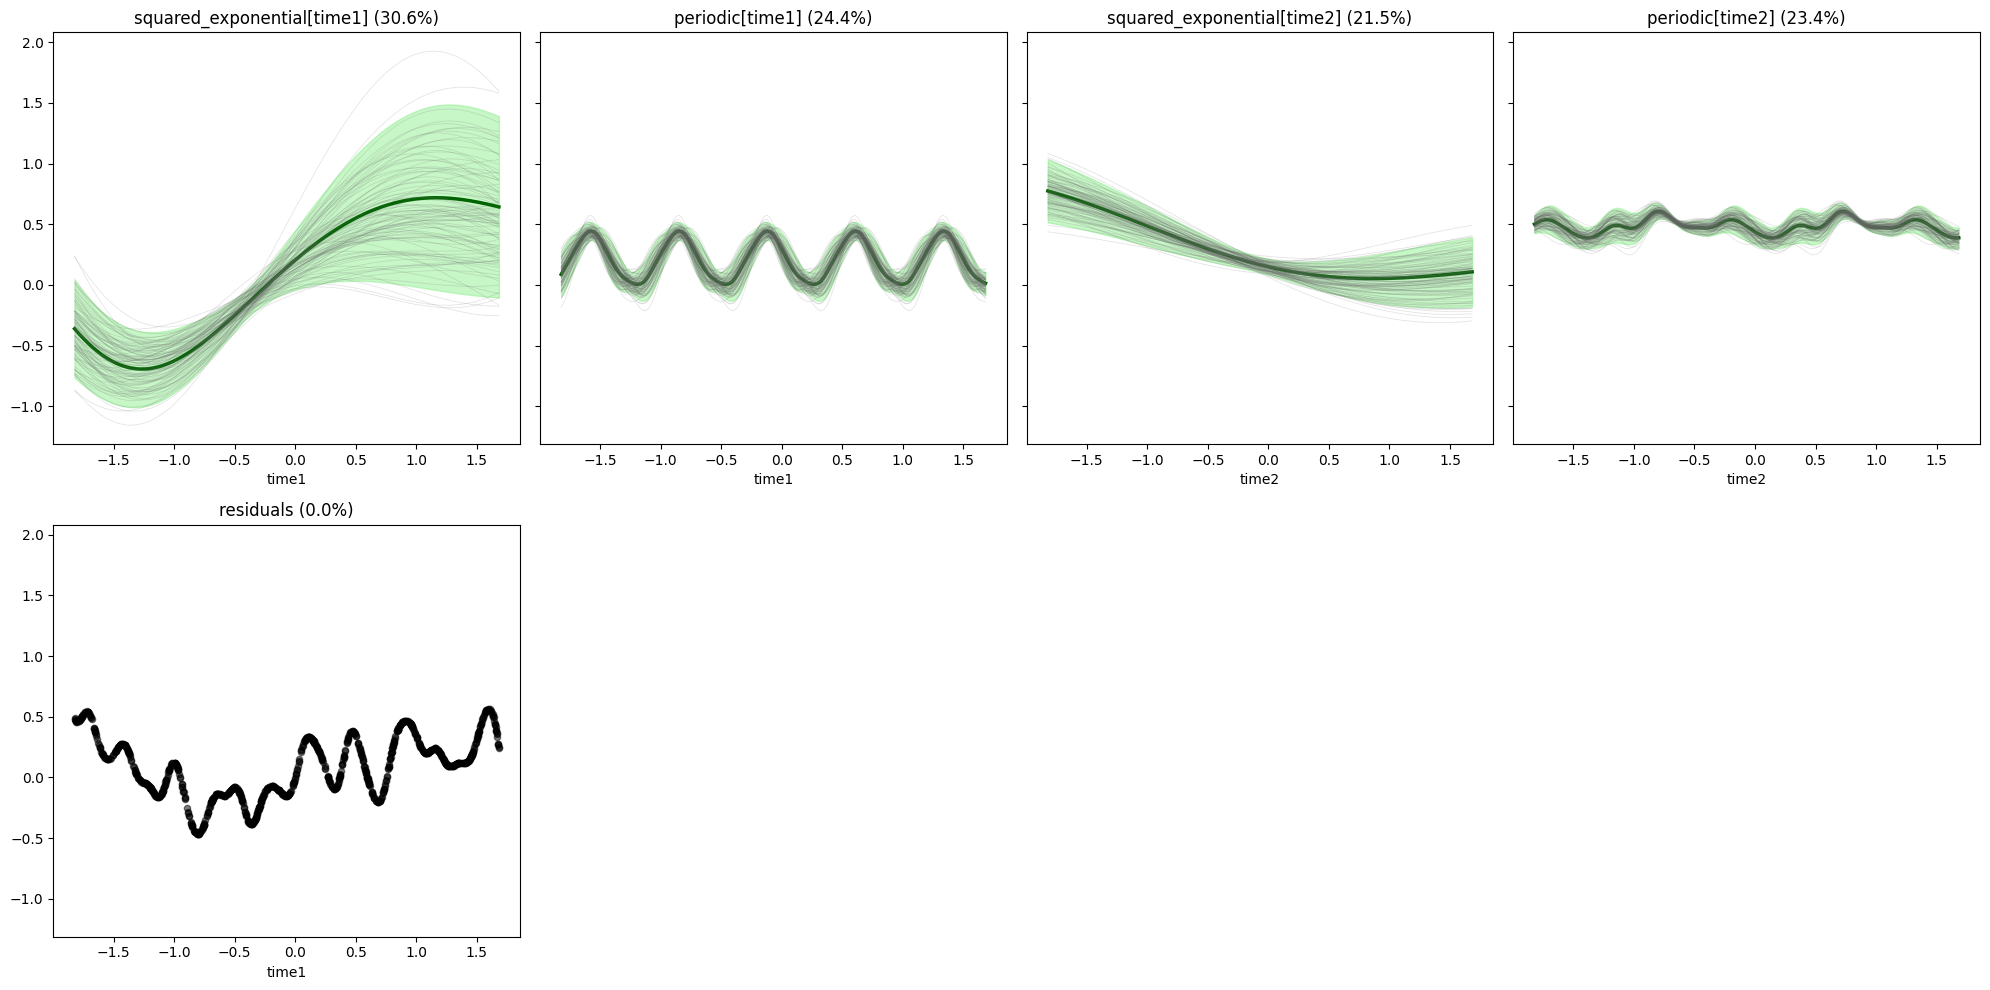

In [48]:
gps_time2.plot_parts(out_label="y_mixed", x_axis_label="time1")

<Axes: xlabel='time1'>

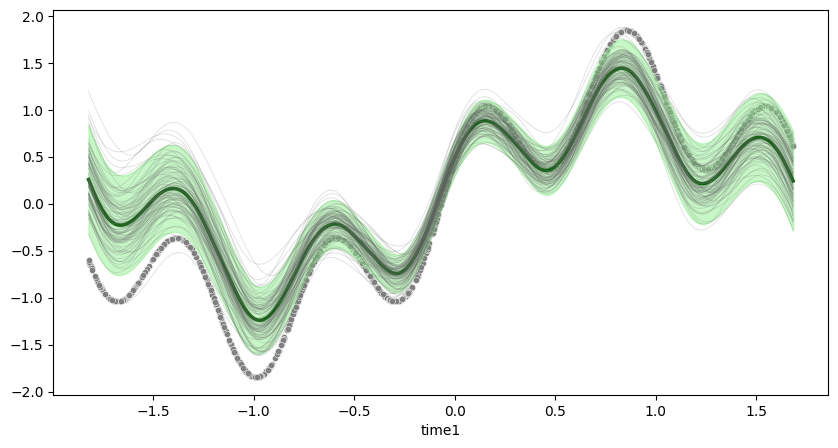

In [49]:
# Faster moving component
gps_time2.plot_marginal(out_label="y_mixed", x_axis_label="time1")

<Axes: xlabel='time2'>

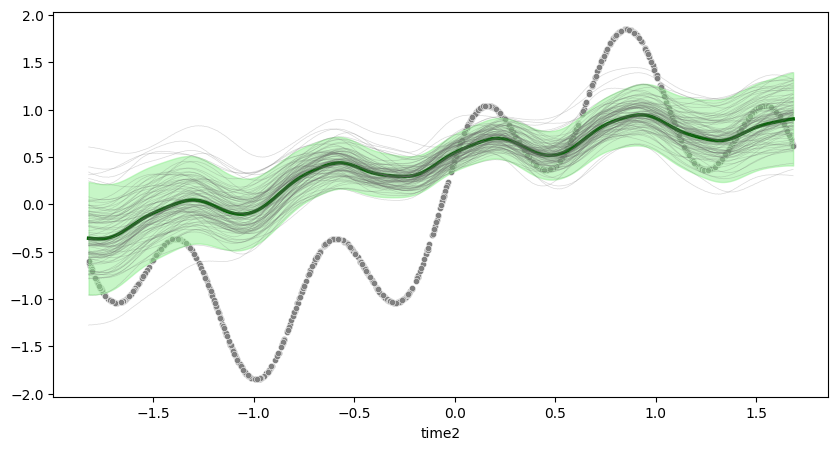

In [50]:
# Slower moving component
gps_time2.plot_marginal(out_label="y_mixed", x_axis_label="time2")